<a href="https://colab.research.google.com/github/Asilbek-dev309/Asilbek-dev309/blob/main/BANKLAR_mijozlar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import jaccard_score
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [ ]:
!pip install -q kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"asilbekjon","key":"65318dc14619384bca18dcba0b2ff541"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c binaryclassificationwithabankchurndataset
!unzip binaryclassificationwithabankchurndataset.zip

Archive:  binaryclassificationwithabankchurndataset.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [ ]:
df1=pd.read_csv('/content/train.csv')

In [ ]:
df1.drop(['id','Surname','CustomerId'],axis=1,inplace=True)

In [ ]:
test=pd.read_csv('/content/test.csv')

In [ ]:
test_labels=test['id'].copy()

In [ ]:
test=test.drop(['id','CustomerId','Surname'],axis=1)

In [ ]:
submission=pd.read_csv('/content/sample_submission.csv')

In [ ]:
labelEncoder=LabelEncoder()

df1['Geography']=labelEncoder.fit_transform(df1.Geography.values)
df1.Geography.value_counts()
df1['Gender']=labelEncoder.fit_transform(df1.Gender.values)
df1.Gender.value_counts()
# 0=France
# 1=Germany
# 2=Spain

# 1=Male
# 0=Female

test['Geography']=labelEncoder.fit_transform(test.Geography.values)
test['Gender']=labelEncoder.fit_transform(test.Gender.values)

In [ ]:
df1.corrwith(df1.Exited).abs().sort_values(ascending=False)

,0
Exited,1.000000
Age,0.449425
NumOfProducts,0.312812
IsActiveMember,0.188748
Gender,0.169465
Balance,0.160062
CreditScore,0.052375
Geography,0.050938
EstimatedSalary,0.035193
Tenure,0.032897


In [ ]:
x=df1.drop('Exited',axis=1)
y=df1['Exited']

In [ ]:
x

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,567.0,0,1,33.0,9.0,0.00,2.0,1.0,0.0,156792.89
1,628.0,0,0,38.0,3.0,0.00,1.0,1.0,1.0,51987.99
2,635.0,0,0,29.0,3.0,0.00,2.0,1.0,1.0,113079.19
3,681.0,0,1,28.0,6.0,0.00,2.0,1.0,0.0,14081.64
4,587.0,0,0,27.0,5.0,0.00,2.0,1.0,0.0,158958.90
...,...,...,...,...,...,...,...,...,...,...
14995,581.0,0,1,35.0,1.0,0.00,2.0,1.0,0.0,161653.50
14996,806.0,1,1,42.0,1.0,129120.64,2.0,1.0,1.0,161642.08
14997,620.0,0,0,29.0,7.0,0.00,2.0,1.0,1.0,161579.85
14998,622.0,1,1,51.0,6.0,106070.89,3.0,1.0,0.0,136869.31


In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [ ]:
tree_model=DecisionTreeClassifier(max_depth=7)
tree_model.fit(x_train,y_train)
y_pred=tree_model.predict(x_test)
print(classification_report(y_test,y_pred))
print('Model aniqligi',accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93      2424
         1.0       0.71      0.63      0.67       576

    accuracy                           0.88      3000
   macro avg       0.81      0.78      0.80      3000
weighted avg       0.88      0.88      0.88      3000

Model aniqligi 0.88


In [ ]:
grid={'max_depth': np.arange(1,15)}
knn_gscv=GridSearchCV(tree_model, grid, cv=5)
knn_gscv.fit(x,y)
knn_gscv.best_params_

{'max_depth': np.int64(7)}

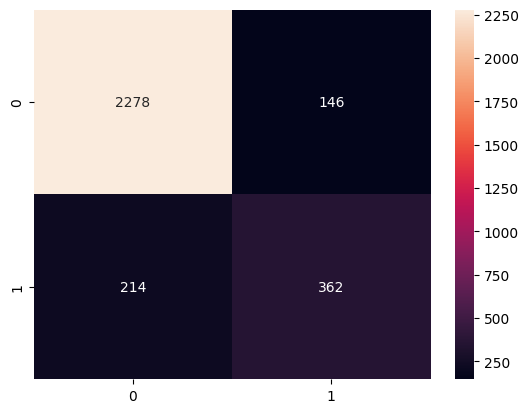

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred)
sns.heatmap(conf_mat,annot=True,fmt='g')
plt.show()

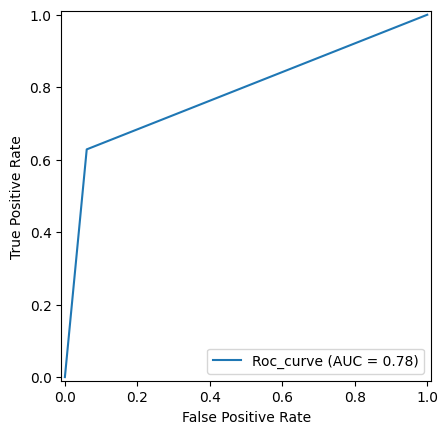

In [ ]:
fpr, tpr, thresholds=metrics.roc_curve(y_test,y_pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name='Roc_curve')
display.plot()
plt.show()

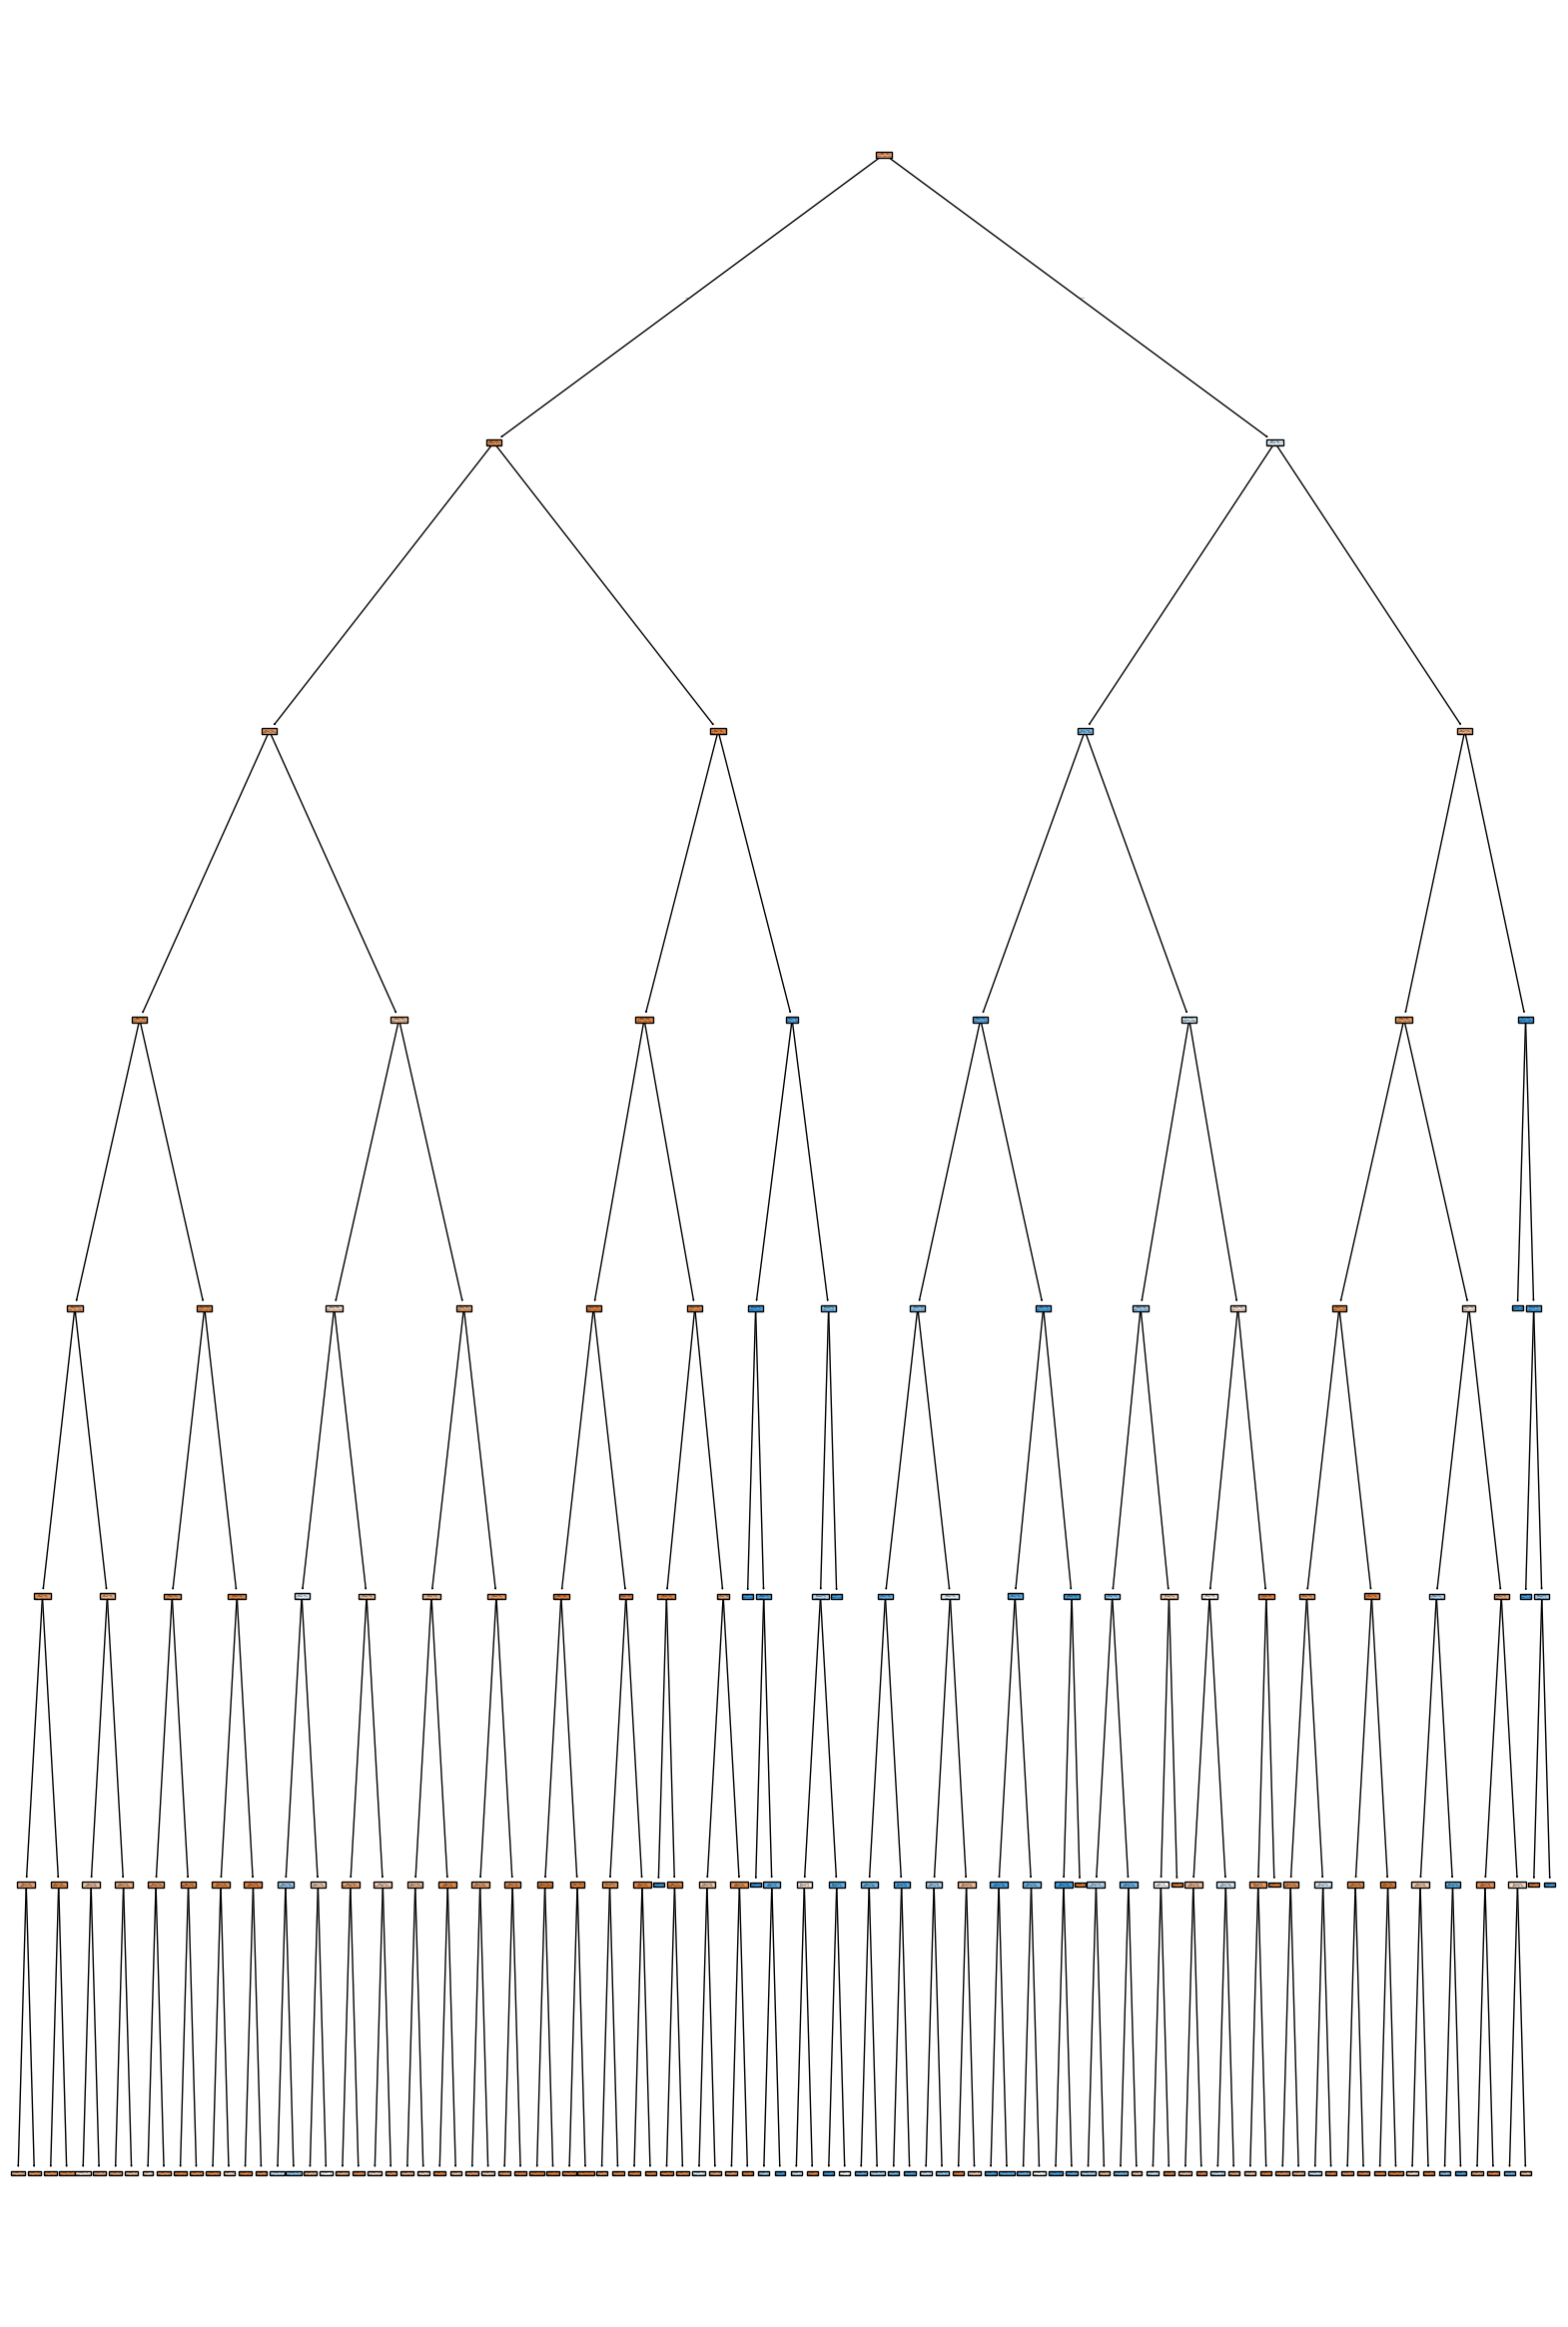

In [ ]:
cols=df1.drop(['Exited'],axis=1).columns
classes=df1.Exited.unique()


plt.figure(figsize=(20,30))
plot_tree(tree_model,feature_names=cols,filled=True)
plt.show()

              precision    recall  f1-score   support

         0.0       0.93      0.94      0.93      2424
         1.0       0.73      0.68      0.70       576

    accuracy                           0.89      3000
   macro avg       0.83      0.81      0.82      3000
weighted avg       0.89      0.89      0.89      3000

Model aniqligi: 0.89


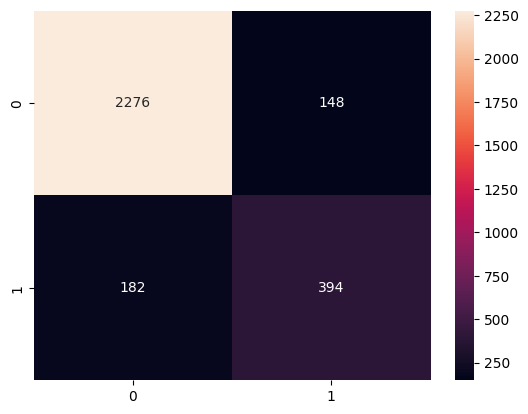

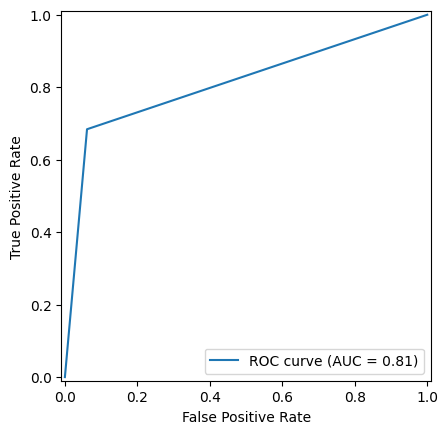

In [ ]:
xgb_model = XGBClassifier()
xgb_model.fit(x_train, y_train)

# Modelni baholaymiz
y_pred = xgb_model.predict(x_test)
print(classification_report(y_test, y_pred))
print("Model aniqligi:", accuracy_score(y_test,y_pred))
## confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_mat, annot=True,fmt="g")
plt.show()

## ROC curve
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred)
roc_auc = metrics.auc(fpr, tpr)
display = metrics.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc, estimator_name='ROC curve')
display.plot()
plt.show()

In [ ]:
test_predicted=xgb_model.predict(test)
test_predict=pd.DataFrame({'Bashorat':test_predicted})
#to'liq test setni bashorat qilgani
test_predict['Bashorat'] = test_predict['Bashorat'].astype(int)
submission_bank = pd.DataFrame(test_labels).join(test_predict, how="inner")

In [ ]:
submission_bank.to_csv('submission_bank.csv', index=False)

In [ ]:
submission_bank.value_counts('Bashorat')

,count
Bashorat,
0,9723
1,277
